In [199]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
from PIL import Image

Передаём переменным before и after изображения 1 (начальная плотность запасов) и 2 (промежуточная плотность запасов)

In [200]:
before = cv2.imread('11.png')
after = cv2.imread('222.png')

Узнаём количество пикселей в переменных и количество цветов, используемое для отображения

In [201]:
print(before.shape)
print(after.shape)

(825, 772, 3)
(812, 773, 3)


Перевод из BGR в RGB

In [202]:
before = cv2.cvtColor(before, cv2.COLOR_BGR2RGB)
after = cv2.cvtColor(after, cv2.COLOR_BGR2RGB)

Исследуем цветовую гамму изображения before

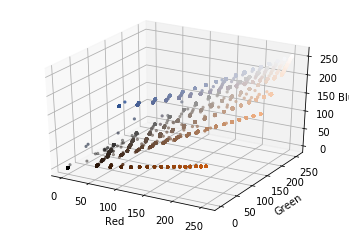

In [203]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

r, g, b = cv2.split(before)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = before.reshape((np.shape(before)[0]*np.shape(before)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

Выводим изображение для поиска координат пикселей, принадлежащих интересующих нас областей

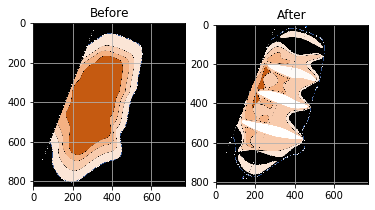

In [204]:
plt.subplot(1, 2, 1).set_title('Before')
plt.imshow(before)
plt.grid()
plt.subplot(1, 2, 2).set_title('After')
plt.imshow(after)
plt.grid()
plt.show()

Определение цвета пикселей в RGB для 4 зон (в порядке убывания по плотности остаточных запасов a, b, c, d) и полностью обвднённой 5-й зоны

In [205]:
img = Image.open('11.png')
img2 = Image.open('222.png')
pixels = img.load() 
pixels2 = img2.load() 
a=pixels[210,500]  # цвет пикселя
b=pixels[400,500]
c=pixels[400,620]
d=pixels[400,680]
water=pixels2[400,400] 

print('A: ',a,'\n',
      'B: ',b,'\n',
      'C: ',c,'\n',
      'D: ',d,'\n',
      'Water: ',water,sep='')

A: (197, 90, 17, 255)
B: (244, 177, 131, 255)
C: (248, 203, 173, 255)
D: (251, 229, 214, 255)
Water: (255, 255, 255, 255)


Загружаем обрезанные по прямой AA' изображения (4 шт.) 

In [206]:
before_left = cv2.imread('before_left.png')
before_right = cv2.imread('before_right.png')
after_left = cv2.imread('after_left.png')
after_right = cv2.imread('after_right.png')

Перевод из BGR в RGB

In [207]:
before_left = cv2.cvtColor(before_left, cv2.COLOR_BGR2RGB)
before_right = cv2.cvtColor(before_right, cv2.COLOR_BGR2RGB)
after_left = cv2.cvtColor(after_left, cv2.COLOR_BGR2RGB)
after_right = cv2.cvtColor(after_right, cv2.COLOR_BGR2RGB)

Выводим изображения

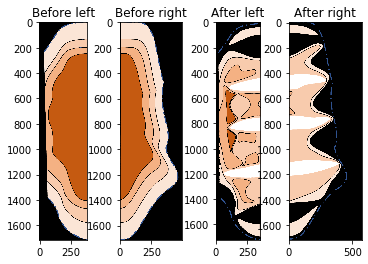

In [208]:
plt.subplot(1, 4, 1).set_title('Before left')
plt.imshow(before_left)
plt.subplot(1, 4, 2).set_title('Before right')
plt.imshow(before_right)
plt.subplot(1, 4, 3).set_title('After left')
plt.imshow(after_left)
plt.subplot(1, 4, 4).set_title('After right')
plt.imshow(after_right)
plt.show()

Функция для расчёта площади выбранной области 

In [209]:
def calc(z, M):
    left=(z[0], z[1], z[2])
    right=left
    mask = cv2.inRange(M, left, right)
    result = cv2.bitwise_and(M, M, mask=mask)
    _, contours,_ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    print('Количество участков', len(contours))
    i=0
    S=0
    while i<len(contours):
        pa=cv2.contourArea(contours[i])
        if pa!=0:
            print(i, ' участок ', pa)
        S+=pa
        i+=1
    print('Общая площадь: ', S)
    plt.subplot(1, 2, 1)
    plt.imshow(mask, cmap="gray")
    plt.subplot(1, 2, 2)
    plt.imshow(result)
    plt.show()
    return S

Название переменной:
1. a/b/c/d - область
2. b/a - before/after
3. l/r - left/right

Количество участков 3
0  участок  246291.5
1  участок  27.5
2  участок  11.5
Общая площадь:  246330.5


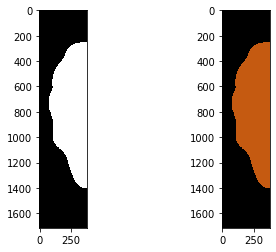

In [210]:
abl=calc(a, before_left)

Количество участков 2
0  участок  4975.5
1  участок  9203.0
Общая площадь:  14178.5


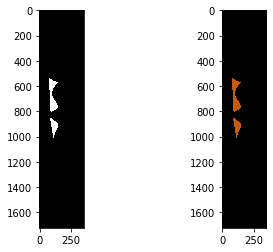

In [211]:
aal=calc(a, after_left)

Количество участков 1
0  участок  82239.0
Общая площадь:  82239.0


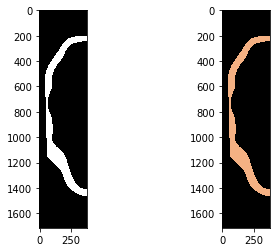

In [212]:
bbl=calc(b, before_left)

Количество участков 32
0  участок  13213.0
1  участок  6503.5
8  участок  46.0
10  участок  1.0
12  участок  42.0
14  участок  8495.0
23  участок  93.5
29  участок  18003.5
30  участок  38551.0
31  участок  16679.5
Общая площадь:  101628.0


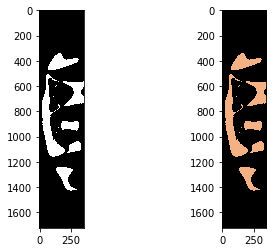

In [213]:
bal=calc(b, after_left)

Количество участков 4
0  участок  29586.5
1  участок  7.0
3  участок  19800.0
Общая площадь:  49393.5


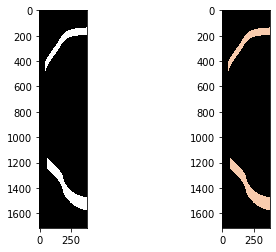

In [214]:
cbl=calc(c, before_left)

Количество участков 6
0  участок  658.0
1  участок  191984.0
2  участок  17099.5
3  участок  8815.5
4  участок  11085.0
5  участок  20565.5
Общая площадь:  250207.5


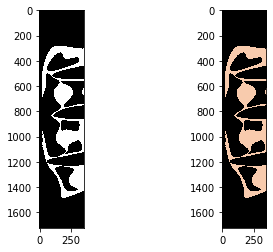

In [215]:
cal=calc(c, after_left)

Количество участков 2
0  участок  40300.0
1  участок  46252.5
Общая площадь:  86552.5


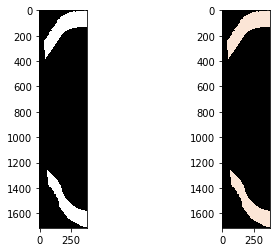

In [216]:
dbl=calc(d, before_left)

Количество участков 28
0  участок  12976.0
2  участок  120.5
9  участок  9744.0
26  участок  12865.0
27  участок  14261.0
Общая площадь:  49966.5


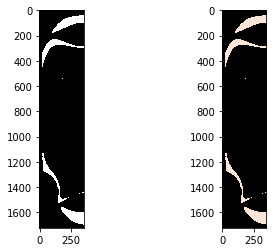

In [217]:
dal=calc(d, after_left)

Количество участков 3
0  участок  180201.5
1  участок  5.5
2  участок  7.0
Общая площадь:  180214.0


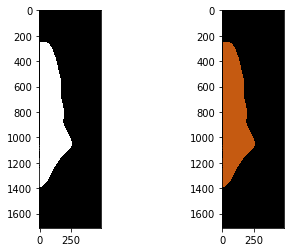

In [218]:
abr=calc(a, before_right)

Количество участков 0
Общая площадь:  0


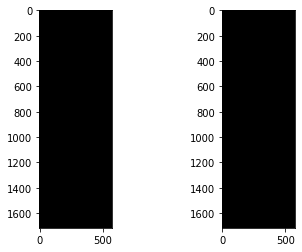

In [219]:
aar=calc(a, after_right)

Количество участков 1
0  участок  73561.5
Общая площадь:  73561.5


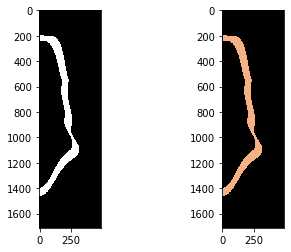

In [220]:
bbr=calc(b, before_right)

Количество участков 2
0  участок  1168.5
1  участок  458.5
Общая площадь:  1627.0


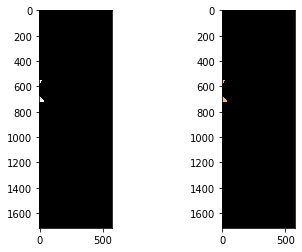

In [221]:
bar=calc(b, after_right)

Количество участков 2
1  участок  90945.5
Общая площадь:  90945.5


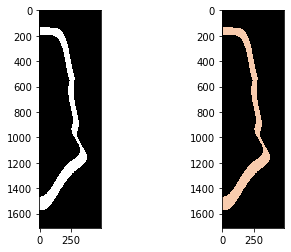

In [222]:
cbr=calc(c, before_right)

Количество участков 2
0  участок  52338.0
1  участок  126859.0
Общая площадь:  179197.0


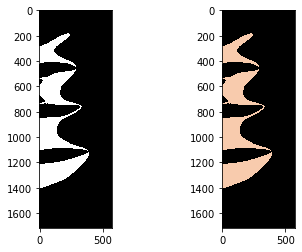

In [223]:
car=calc(c, after_right)

Количество участков 13
12  участок  146400.0
Общая площадь:  146400.0


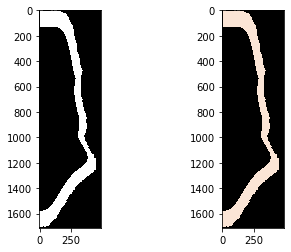

In [224]:
dbr=calc(d, before_right)

Количество участков 19
0  участок  17777.5
17  участок  42525.5
18  участок  10937.0
Общая площадь:  71240.0


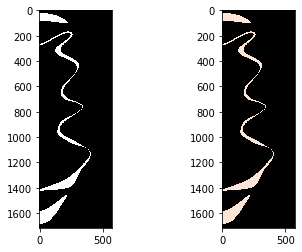

In [225]:
dar=calc(d, after_right)

Расчёт условных объёмов с учётом "плотности подвижных запасов нефти"

In [226]:
A=10
B=8
C=6
D=4

def calcV(a_lr,b_lr,c_lr,d_lr):
    V=A*a_lr+B*b_lr+C*c_lr+D*d_lr
    return V

before_Vl=calcV(abl, bbl,cbl,dbl)
before_Vr=calcV(abr,bbr,cbr,dbr)
after_Vl=calcV(aal,bal,cal,dal)
after_Vr=calcV(aar,bar,car,dar)

print('before_Vl: ', before_Vl, '\n', 'before_Vr: ', before_Vr, '\n', 'after_Vl: ', after_Vl, '\n', 'after_Vr: ', after_Vr, sep='')

before_Vl: 3763788.0
before_Vr: 3521905.0
after_Vl: 2655920.0
after_Vr: 1373158.0


Вычислим какое количество запасов (в процентах) по отдельности в левой и правой части месторождения осталось после разработки от начальных запасов по отдельности в левой и правой части соответственно.

In [227]:
def percentage(after_V,before_V):
    p=round(((after_V/before_V)*100), 2)
    return p
    
percentage_l=percentage(after_Vl,before_Vl)
percentage_r=percentage(after_Vr,before_Vr)


print('Осталось запасов нефти в левой части от начальных запасов в левой части месторождения: ', percentage_l, '%', '\n',
      'Осталось запасов нефти в правой части от начальных запасов в левой части месторождения: ', percentage_r, '%', sep='')

Осталось запасов нефти в левой части от начальных запасов в левой части месторождения: 70.57%
Осталось запасов нефти в правой части от начальных запасов в левой части месторождения: 38.99%


Расчёт площади обводнённой области

Количество участков 4
0  участок  19804.0
1  участок  18204.5
2  участок  17445.5
3  участок  5.5
Общая площадь:  55459.5


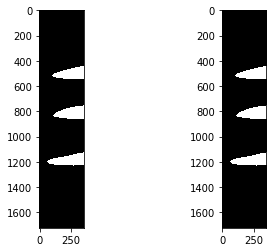

Количество участков 3
0  участок  32227.5
1  участок  25840.0
2  участок  22814.0
Общая площадь:  80881.5


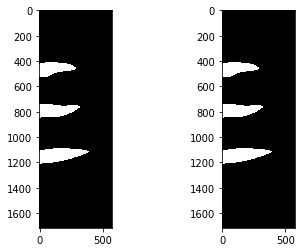

In [228]:
wl=calc(water, after_left)
wr=calc(water, after_right)

Рассчитаем какой процент составляет площадь обводнившейся области в левой и правой части по отдельности от общей площади обводнившейся области по месторождению. 

In [229]:
w_all=wl+wr
def percentage_w(w):
    p_w=round((w/w_all)*100, 2)
    return p_w
    
percentage_wl=percentage_w(wl)
percentage_wr=percentage_w(wr)

print('Обводнённая площадь в левой части от общей обводнённой площади: ', percentage_wl, '%', '\n',
      'Оводнённая площадь в правой части от общей обводнённой площади: ', percentage_wr, '%', sep='')

Обводнённая площадь в левой части от общей обводнённой площади: 40.68%
Оводнённая площадь в правой части от общей обводнённой площади: 59.32%
